In [149]:
import pandas as pd
import numpy as np

## Upravljanje podacima

In [150]:
columns = ['Id', 'Survived', 'Class','Name','Sex','Age','Sibilings/Spouses Aboard','Parents/Children Aboard',
           'Ticket Num','Fare','Cabin','Embarked']
target_column = 'Survived'

features = columns.copy()
features.remove(target_column)

In [151]:
import os

relpath = 'data\\titanic_dataset\\train.csv'
abspath = os.path.abspath(relpath)

#Učitamo podatke iz fajla train.csv 
df = pd.read_csv(abspath, header=0, names=columns)

In [152]:
#Pregled broja redova i kolona

print(df.shape)

(891, 12)


In [153]:
#Pregled postojecih kolona

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        891 non-null    int64  
 1   Survived                  891 non-null    int64  
 2   Class                     891 non-null    int64  
 3   Name                      891 non-null    object 
 4   Sex                       891 non-null    object 
 5   Age                       714 non-null    float64
 6   Sibilings/Spouses Aboard  891 non-null    int64  
 7   Parents/Children Aboard   891 non-null    int64  
 8   Ticket Num                891 non-null    object 
 9   Fare                      891 non-null    float64
 10  Cabin                     204 non-null    object 
 11  Embarked                  889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
#Pregled numerickih kolona

df.describe()

,Id,Survived,Class,Age,Sibilings/Spouses Aboard,Parents/Children Aboard,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [155]:
#Izdvajanje imena kategorickih kolona od numerickih

numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features, '\n')

categorical_features = df.select_dtypes(exclude='number').columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 7 numerical features:
['Id', 'Survived', 'Class', 'Age', 'Sibilings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'] 

There are 5 categorical features: 

['Name', 'Sex', 'Ticket Num', 'Cabin', 'Embarked']


In [156]:
#Pregled unikatnih vrednosti u kategorickim kolonama

for col in categorical_features:
    vals = df[col].value_counts()
    print(f"Unique values ({len(vals)}) in the '{col}' column:", '\n')
    print(vals, '\n')

Unique values (891) in the 'Name' column: 

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64 

Unique values (2) in the 'Sex' column: 

male      577
female    314
Name: Sex, dtype: int64 

Unique values (681) in the 'Ticket Num' column: 

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket Num, Length: 681, dtype: int64 

Unique values (147) in the 'Cabin' column: 

B96 B98        4
G6 

## Vizualizacija podataka

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

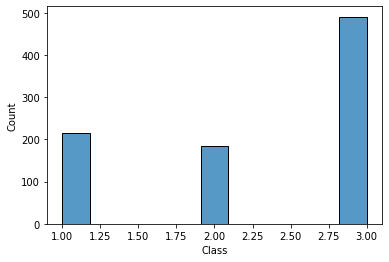

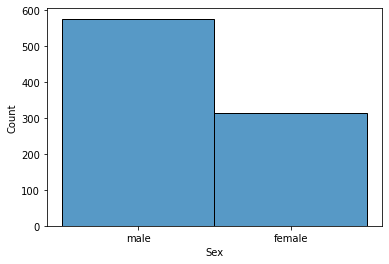

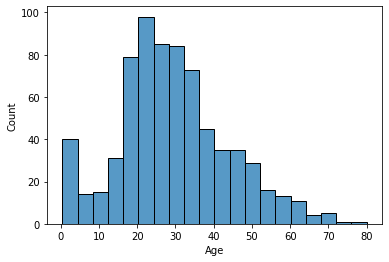

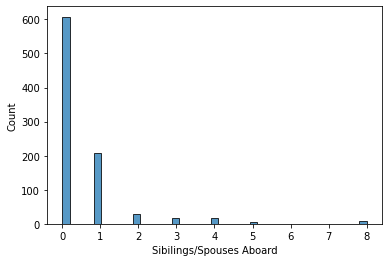

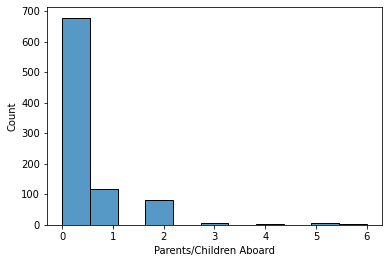

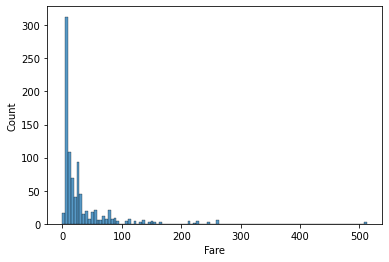

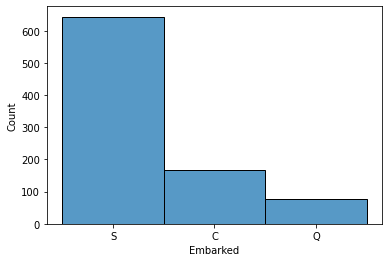

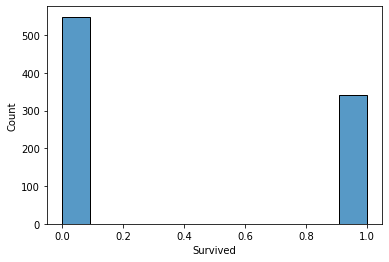

In [158]:
#Izbacivanje kolona sa jedinstvenim vrednostima
features_tovisualize = features.copy()
features_tovisualize.remove('Name')
features_tovisualize.remove('Id')
features_tovisualize.remove('Ticket Num')
features_tovisualize.remove('Cabin')

#Kreiranje histograma za sve kolone osobina (i ciljnu kolonu)
for col in features_tovisualize + [target_column]:
    plt.figure()
    sns.histplot(data=df, x=col)

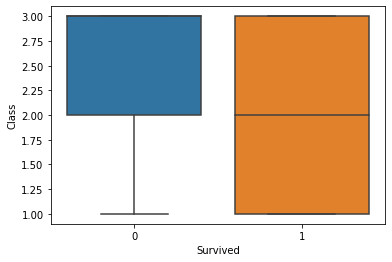

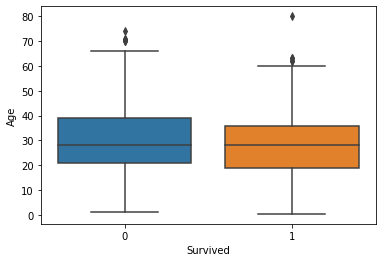

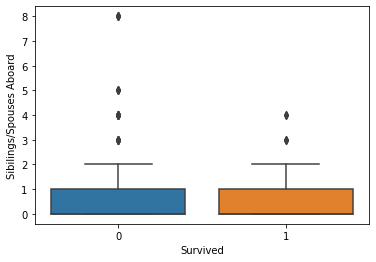

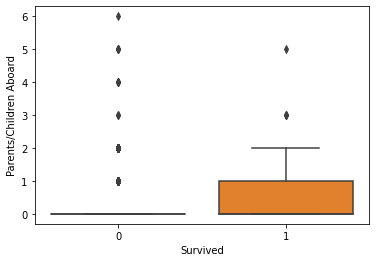

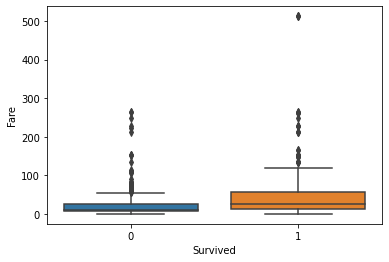

In [159]:
#Izbaci ciljnu kolonu
num_features_tovisualize = numerical_features.copy()
num_features_tovisualize.remove('Survived')
num_features_tovisualize.remove('Id')

#Kreiranje box figura za sve kolone osobina, naspram ciljne kolone
for col in num_features_tovisualize:
    plt.figure()
    sns.boxplot(data=df, x=target_column, y=col, orient='v')

<Figure size 432x288 with 0 Axes>

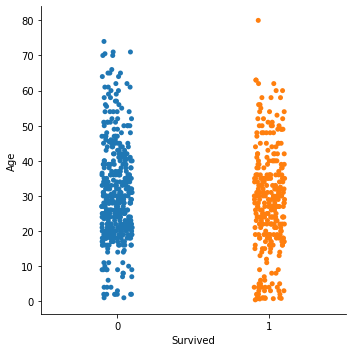

<Figure size 432x288 with 0 Axes>

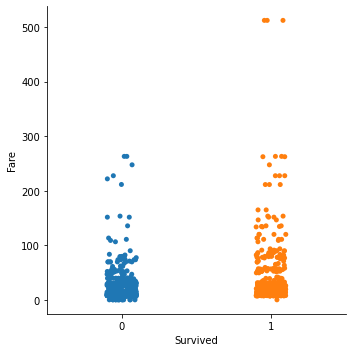

<Figure size 432x288 with 0 Axes>

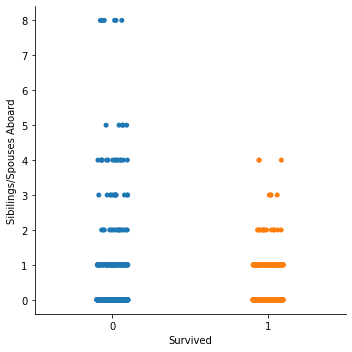

<Figure size 432x288 with 0 Axes>

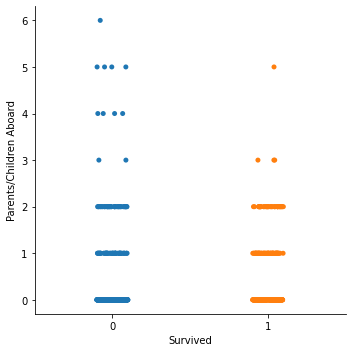

In [160]:
#Kreiranje cat scatter figura za sve kolone osobina, naspram ciljne kolone
for col in ['Age','Fare','Sibilings/Spouses Aboard','Parents/Children Aboard']:
    plt.figure()
    sns.catplot(data=df, x=target_column, y=col, orient='v', kind='strip')

<Figure size 432x288 with 0 Axes>

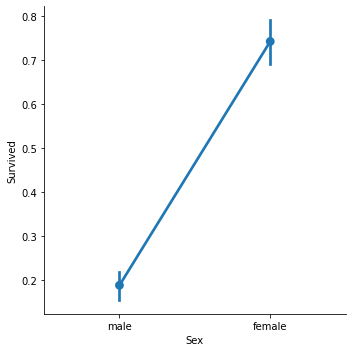

<Figure size 432x288 with 0 Axes>

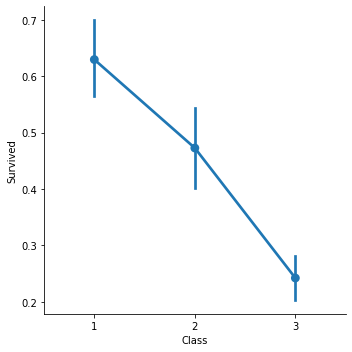

In [161]:
#Kreiranje cat point figura za sve kolone osobina, naspram ciljne kolone
for col in ['Sex','Class']:
    plt.figure()
    sns.catplot(data=df, x=col, y=target_column, kind='point')

<AxesSubplot:>

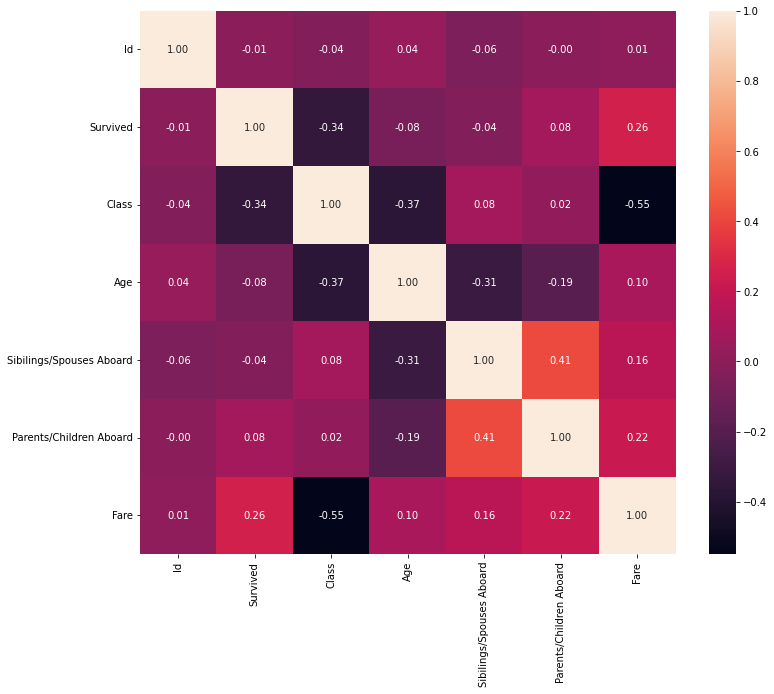

In [162]:
#Kreiranje toplotne mape korelacija
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

## Priprema podataka

### Rad sa nepoznatim vrednostima

In [163]:
#Prikaz nepoznatih vrednosti

columns_with_miss = df.isnull().sum() > 0
total_rows = df.shape[0]

print("Columns with missing values: ")
res = df.isnull().sum()[columns_with_miss]
res = res.apply(lambda x: f'{x}/{total_rows}')
print(res)

Columns with missing values: 
Age         177/891
Cabin       687/891
Embarked      2/891
dtype: object


In [164]:
#Izbacivanje redova koji nemaju vrednosti u 'Embarked' koloni

rows_with_embarked = df['Embarked'].notna()
df = df[rows_with_embarked]

In [165]:
#Izbacivanje kolone 'Cabin'

df = df.drop(columns=['Cabin'])
categorical_features.remove('Cabin')
features.remove('Cabin')

In [166]:
#Popunjivanje nepoznatih vrednosti u 'Age' koloni sa prosecnom vrednoscu (pandas metoda)

age_mean = df['Age'].mean()
filled_age_pd = df['Age'].fillna(value=age_mean)

In [167]:
#Popunjivanje nepoznatih vrednosti u 'Age' koloni sa prosecnom vrednoscu (sklearn metoda)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
filled_age_sk = imputer.fit_transform(df[['Age']])

In [168]:
#Unesi generisane vrednosti
df['Age'] = filled_age_pd

### Rad sa ekstremnim vrednostima

In [169]:
#Definisanje funkcija za detektovanje ekstremnih vrednosti

def outliers_iqr(x: pd.Series):
    q1, q3 = np.percentile(x, [25, 75])
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))[0]

def outliers_z_score(ys: pd.Series):
    threshold = 3

    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

def outliers_modified_z_score(ys: pd.Series):
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    
    if median_absolute_deviation_y == 0:
        median_absolute_deviation_y = np.finfo(np.double).min
    
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return np.where(np.abs(modified_z_scores) > threshold)[0]

In [170]:
#Prikaz broja ekstremnih vrednosti za svaku numericku kolonu

outliers = {}
print("Outliers:",' ' * 26,"IQR ZScore ModZScore")
for col in numerical_features:
    outliersIQR = outliers_iqr(df[col])
    outliersZScore = outliers_z_score(df[col])
    outliersModZScore = outliers_modified_z_score(df[col])
    outliers[col] = (outliersIQR, outliersZScore, outliersModZScore)
    print(f"Column '{col:24}': {len(outliersIQR):5} {len(outliersZScore):6} {len(outliersModZScore):9}")
print()

Outliers:                            IQR ZScore ModZScore
Column 'Id                      ':     0      0         0
Column 'Survived                ':     0      0         0
Column 'Class                   ':     0      0         0
Column 'Age                     ':    65      7        15
Column 'Sibilings/Spouses Aboard':    46     30         0
Column 'Parents/Children Aboard ':   213     15         0
Column 'Fare                    ':   114     20       158



### Kodiranje kategoričkih podataka

In [171]:
#Pregled kategorickih kolona

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['Name', 'Sex', 'Ticket Num', 'Embarked']


In [172]:
#Izbacicemo kolone "Name" i "Ticket Num"

df = df.drop(columns=["Name", "Ticket Num"])

In [173]:
#Zamena vrednosti kolona "Survived" i "Class"

df = df.replace(to_replace=
                {
                    "Survived": {0: "No", 1: "Yes"},
                    "Class": {1: "First", 2: "Second", 3: "Third"}
                })

<AxesSubplot:xlabel='Class', ylabel='Count'>

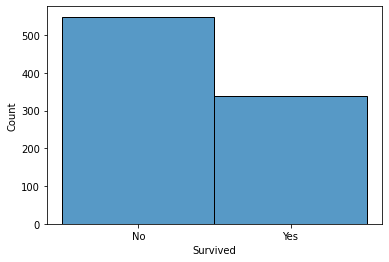

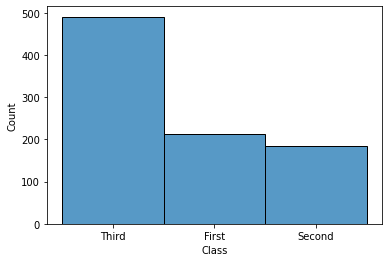

In [174]:
#Vizualizacija tih vrednosti

plt.figure()
sns.histplot(data=df, x="Survived")

plt.figure()
sns.histplot(data=df, x="Class")

In [175]:
from sklearn.preprocessing import LabelEncoder
from pandas import get_dummies

In [176]:
#Kodiranje kolone "Survived" kroz LabelEncoder (target kolona)

lab_encoder = LabelEncoder()
df['Survived'] = lab_encoder.fit_transform(df['Survived'])

In [177]:
#Kodiranje kolona "Sex" i "Embarked" putem OneHotEncoding pandas metode

df = get_dummies(df, columns=["Sex","Embarked"], drop_first=True)

In [178]:
#Kodiranje kolone "Class" kroz ordinal encoder

df = df.replace(to_replace=
                {
                    "Class": {"First": 3, "Second": 2, "Third": 1}
                })

In [179]:
#Trenutni pregled kolona

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        889 non-null    int64  
 1   Survived                  889 non-null    int32  
 2   Class                     889 non-null    int64  
 3   Age                       889 non-null    float64
 4   Sibilings/Spouses Aboard  889 non-null    int64  
 5   Parents/Children Aboard   889 non-null    int64  
 6   Fare                      889 non-null    float64
 7   Sex_male                  889 non-null    uint8  
 8   Embarked_Q                889 non-null    uint8  
 9   Embarked_S                889 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 54.7 KB


### Skaliranje numeričkih podataka

In [180]:
#Pregled numerickih kolona

numerical_features = df.select_dtypes(include='number').columns.tolist()
print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features, '\n')

There are 10 numerical features:
['Id', 'Survived', 'Class', 'Age', 'Sibilings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S'] 



In [181]:
#Izbacujemo kolonu "Id" i cistimo listu numerickih kolona

df = df.drop(columns=['Id'])
numerical_features.remove('Id')
numerical_features.remove('Survived')
numerical_features.remove('Class')
numerical_features.remove('Sex_male')
numerical_features.remove('Embarked_Q')
numerical_features.remove('Embarked_S')

print(f'There are {len(numerical_features)} numerical features:')
print(numerical_features, '\n')

There are 4 numerical features:
['Age', 'Sibilings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'] 



In [182]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [183]:
#Skaliranje MinMaxScalerom

minmax_df = df.copy()
minmax_scaler = MinMaxScaler(feature_range=(0,1))
minmax_df[numerical_features] = minmax_scaler.fit_transform(df[numerical_features])

In [184]:
#Skaliranje StandardScalerom

std_df = df.copy()
std_scaler = StandardScaler()
std_df[numerical_features] = std_scaler.fit_transform(df[numerical_features])

In [185]:
#Skaliranje RobustScalerom

rbst_df = df.copy()
rbst_scaler = RobustScaler()
rbst_df[numerical_features] = rbst_scaler.fit_transform(df[numerical_features])

In [186]:
#Pregled originalne skale podataka

df[numerical_features].describe()

,Age,Sibilings/Spouses Aboard,Parents/Children Aboard,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.642093,0.524184,0.382452,32.096681
std,12.968346,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,29.642093,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [187]:
#Pregled minmax skale podataka

minmax_df[numerical_features].describe()

,Age,Sibilings/Spouses Aboard,Parents/Children Aboard,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,0.367204,0.065523,0.063742,0.062649
std,0.162960,0.137963,0.134460,0.097003
min,0.000000,0.000000,0.000000,0.000000
25%,0.271174,0.000000,0.000000,0.015412
50%,0.367204,0.000000,0.000000,0.028213
75%,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000


In [188]:
#Pregled std skale podataka

std_df[numerical_features].describe()

,Age,Sibilings/Spouses Aboard,Parents/Children Aboard,Fare
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02
mean,-2.957264e-16,-3.197043e-17,-4.795564e-17,1.398706e-16
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00
min,-2.254608e+00,-4.751991e-01,-4.743259e-01,-6.462044e-01
25%,-5.896199e-01,-4.751991e-01,-4.743259e-01,-4.872378e-01
50%,-5.482138e-16,-4.751991e-01,-4.743259e-01,-3.551972e-01
75%,4.133853e-01,4.313502e-01,-4.743259e-01,-2.207954e-02
max,3.885326e+00,6.777195e+00,6.967010e+00,9.668551e+00


In [189]:
#Pregled robust skale podataka

rbst_df[numerical_features].describe()

,Age,Sibilings/Spouses Aboard,Parents/Children Aboard,Fare
count,8.890000e+02,889.000000,889.000000,889.000000
mean,2.717486e-16,0.524184,0.382452,0.763605
std,9.975651e-01,1.103705,0.806761,2.151016
min,-2.247853e+00,0.000000,0.000000,-0.625609
25%,-5.878533e-01,0.000000,0.000000,-0.283862
50%,0.000000e+00,0.000000,0.000000,0.000000
75%,4.121467e-01,1.000000,0.000000,0.716138
max,3.873685e+00,8.000000,6.000000,21.549112


In [190]:
#Sacuvacemo podatke skalirane od 0 do 1

df[numerical_features] = minmax_df[numerical_features]

## Klasifikacija

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
#Razdvajamo podatke na X i Y

X, Y = df.drop(columns=[target_column]), df[target_column]

In [194]:
#Treniramo model

dtc = DecisionTreeClassifier()
res = dtc.fit(X,Y)

In [195]:
#Predvidjamo rezultat

first_row = X.iloc[[0]]
real_label = Y.iloc[0]

predicted_label = res.predict(first_row)[0]
print(f"Real label for row: {real_label} Predicted label: {predicted_label}")

Real label for row: 0 Predicted label: 0


### Testiranje

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
#Podeli skup tako da je 70% za treniranje, a 30% za testiranje

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [198]:
#Treniranje modela

dtc = DecisionTreeClassifier()
res = dtc.fit(X_train, Y_train)

In [199]:
#Testiranje modela

accuracy_score = res.score(X_test, Y_test)
print(f"Model accuracy: {accuracy_score}")

Model accuracy: 0.7602996254681648


In [200]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [201]:
#Priprema KFold objekat sa k=10

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [202]:
#Testira cross validacijom

dtc = DecisionTreeClassifier()
cv_results = cross_validate(dtc, X, Y, cv=kfold, n_jobs=-1)

In [203]:
#Racuna prosek rezultata

acc_scores = cv_results['test_score']
mean_acc = np.mean(acc_scores)
print(f"Mean model accuracy: {mean_acc}")

Mean model accuracy: 0.7862359550561797


In [204]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

In [205]:
#Priprema metrika za ocenjivanje

scoring_metrics = {
        'accuracy': make_scorer(accuracy_score),
        'precision_0': make_scorer(precision_score, pos_label=0),
        'precision_1': make_scorer(precision_score, pos_label=1),
        'recall_0': make_scorer(recall_score, pos_label=0),
        'recall_1': make_scorer(recall_score, pos_label=1),
        'f1_0': make_scorer(f1_score, pos_label=0),
        'f1_1': make_scorer(f1_score, pos_label=1)
    }

In [206]:
#Testira cross validacijom

dtc = DecisionTreeClassifier()
cv_results = cross_validate(dtc, X, Y, scoring=scoring_metrics, cv=kfold, n_jobs=-1)

In [207]:
#Racuna prosek rezultata

AccuScores = cv_results['test_accuracy']
Prec0Scores = cv_results['test_precision_0']
Prec1Scores = cv_results['test_precision_1']
Rec0Scores = cv_results['test_recall_0']
Rec1Scores = cv_results['test_recall_1']
F10Scores = cv_results['test_f1_0']
F11Scores = cv_results['test_f1_1']

AccuScore = np.mean(AccuScores)
Prec0Score = np.mean(Prec0Scores)
Prec1Score = np.mean(Prec1Scores)
Rec0Score = np.mean(Rec0Scores)
Rec1Score = np.mean(Rec1Scores)
F10Score = np.mean(F10Scores)
F11Score = np.mean(F11Scores)

In [208]:
print('Performance results:')
print('Accuracy: {:.3%}'.format(AccuScore))
print('Precision for class 0: {:.3%}'.format(Prec0Score))
print('Precision for class 1: {:.3%}'.format(Prec1Score))
print('Recall for class 0: {:.3%}'.format(Rec0Score))
print('Recall for class 1: {:.3%}'.format(Rec1Score))
print('F1 for class 0: {:.3%}'.format(F10Score))
print('F1 for class 1: {:.3%}'.format(F11Score))

Performance results:
Accuracy: 78.400%
Precision for class 0: 83.039%
Precision for class 1: 71.591%
Recall for class 0: 81.963%
Recall for class 1: 72.647%
F1 for class 0: 82.394%
F1 for class 1: 71.921%


### Biranje modela

In [209]:
def test_model(model, X: pd.DataFrame, Y: pd.DataFrame):
    #Prepare testing objects
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

    #Training and testing
    cv_results = cross_validate(model, X, Y, scoring=scoring_metrics,
     cv=cv, n_jobs=-1)

    AccuScores = cv_results['test_accuracy']
    Prec0Scores = cv_results['test_precision_0']
    Prec1Scores = cv_results['test_precision_1']
    Rec0Scores = cv_results['test_recall_0']
    Rec1Scores = cv_results['test_recall_1']
    F10Scores = cv_results['test_f1_0']
    F11Scores = cv_results['test_f1_1']

    return { 
        'Accuracy': np.mean(AccuScores),
        'Precision 0': np.mean(Prec0Scores),
        'Precision 1': np.mean(Prec1Scores),
        'Recall 0': np.mean(Rec0Scores),
        'Recall 1': np.mean(Rec1Scores),
        'F1 0': np.mean(F10Scores),
        'F1 1': np.mean(F11Scores)
    }

In [210]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [211]:
#Testiraj svaki model

test_results = {}
test_results['Decision Tree'] = test_model(DecisionTreeClassifier(), X, Y)
test_results['Support Vector Machine'] = test_model(SVC(), X, Y)
test_results['Random Forest'] = test_model(RandomForestClassifier(), X, Y)
test_results['K Nearest Neighbors'] = test_model(KNeighborsClassifier(), X, Y)
test_results['Gaussian Naive Bayes'] = test_model(GaussianNB(), X, Y)

In [212]:
#Spoji rezultate

testing_df = pd.DataFrame.from_dict(test_results, orient='index')

<AxesSubplot:>

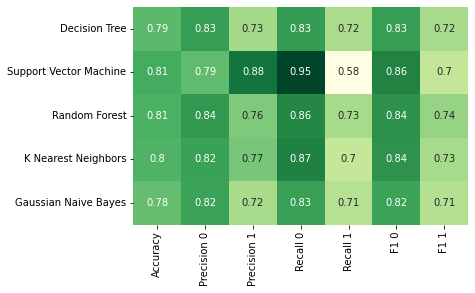

In [213]:
sns.heatmap(testing_df, annot=testing_df, cmap="YlGn", cbar=False)

### Optimizovanje hiperparametra

In [226]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import truncnorm, randint
import time

In [227]:
#Definisemo distribucije parametra za nasumicnu pretragu

decTree_param_dist = {
    'n_estimators': randint(4,200),
    'max_depth': randint(8,128),
    'min_samples_split': randint(2,32),
    'max_leaf_nodes': randint(2,128),
    'max_features': truncnorm(a=0, b=1, loc=0.5, scale=0.1),
}

In [228]:
#Priprema objekata za nasumicno testiranje hiperparametraskih kombinacija

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

#Prepare optimization
randomCV = RandomizedSearchCV(RandomForestClassifier(), scoring=scoring_metrics,
                              param_distributions=decTree_param_dist, refit='accuracy', 
                              cv=cv, n_jobs=-1, n_iter=100)

In [229]:
#Nasumicno trazenje najboljih hiperparametra

print(f"Optimizing hyperparameters with a randomized search...")
startTime = time.perf_counter()
randomCV.fit(X,Y)
endTime = time.perf_counter()
print(f"Parameters optimized in {endTime - startTime:0.4f} seconds.")

best_random_params = randomCV.best_params_

Optimizing hyperparameters with a randomized search...
Parameters optimized in 28.7607 seconds.


In [230]:
#Definišemo opseg hiperparametra za iscrpnu pretragu

decTree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [8,16,32,64,128],
    'min_samples_split': [2,4,8,16,32],
    'max_leaf_nodes': [2,4,8,16,32,64,128, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [231]:
#Priprema objekata za iscrpno testiranje hiperparametraskih kombinacija

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

#Prepare optimization
gridCV = GridSearchCV(RandomForestClassifier(), scoring=scoring_metrics,
    param_grid=decTree_param_grid, refit='accuracy', cv=cv, n_jobs=-1)

In [232]:
#Iscrpno trazenje najboljih hiperparametra

print(f"Optimizing hyperparameters with a grid search...")
startTime = time.perf_counter()
gridCV.fit(X,Y)
endTime = time.perf_counter()
print(f"Parameters optimized in {endTime - startTime:0.4f} seconds.")

best_grid_params = gridCV.best_params_

Optimizing hyperparameters with a grid search...
Parameters optimized in 479.1397 seconds.


In [233]:
#Pregled izabranih hiperparametra

print("Best random parameters:", randomCV.best_params_)
print("Best grid parameters:", gridCV.best_params_)

Best random parameters: {'max_depth': 108, 'max_features': 0.5297115906250106, 'max_leaf_nodes': 59, 'min_samples_split': 18, 'n_estimators': 187}
Best grid parameters: {'criterion': 'entropy', 'max_depth': 16, 'max_features': None, 'max_leaf_nodes': 64, 'min_samples_split': 8}


<AxesSubplot:>

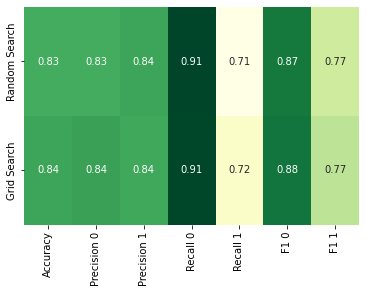

In [235]:
#Spajanje ocena najboljih modela
test_results = {}
test_results['Random Search'] = test_model(randomCV.best_estimator_, X, Y)
test_results['Grid Search'] = test_model(gridCV.best_estimator_, X, Y)

#Spoji rezultate
testing_df = pd.DataFrame.from_dict(test_results, orient='index')

#Pregled ocena
sns.heatmap(testing_df, annot=testing_df, cmap="YlGn", cbar=False)

In [240]:
#Definisi lokaciju za cujvanje najboljeg modela
import pickle

path_tosave = os.path.abspath('data/titanic_dataset/best_model.pkl')

In [241]:
#Cuvamo najbolji model

best_model = gridCV.best_estimator_

with open(path_tosave,"wb") as file:
    pickle.dump(best_model, file)

In [242]:
#Ucitamo najbolji model

best_model = None

with open(path_tosave, "rb") as file:
    best_model = pickle.load(file)

### Redukcija dimenzionalnosti

In [243]:
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

In [244]:
#Priprema vrednosti
from math import ceil
target_col_count = ceil(X.shape[1]/2)

selector_testing_results = {} 
selector_results = {}

In [245]:
#Testiranja transformisanja kolona

label = "PCA"
pca = PCA(n_components=target_col_count)

principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents)
test_results = test_model(best_model, principalDf, Y)

selector_testing_results[label] = test_results
selector_results[label] = principalDf

In [248]:
#Testiranje rekurzivnog eliminisanja kolona

label = "RFE"
rfe = RFE(best_model,n_features_to_select=target_col_count)

res = rfe.fit(X,Y)

X_rfe = X.loc[:, res.get_support()]
test_results = test_model(best_model, X_rfe, Y)

selector_testing_results[label] = test_results
selector_results[label] = X_rfe

In [249]:
#Statisticko biranje kolona

label = "Univariate"
uni = SelectKBest(mutual_info_classif, k=target_col_count)

res = uni.fit(X,Y)
X_uni = X.loc[:, res.get_support()]

test_results = test_model(best_model, X_uni, Y)

selector_testing_results[label] = test_results
selector_results[label] = X_uni

In [251]:
print("Recursive Feature Extraction Columns:", X_rfe.columns)
print("Univariate Columns:", X_uni.columns)

Recursive Feature Extraction Columns: Index(['Class', 'Age', 'Fare', 'Sex_male'], dtype='object')
Univariate Columns: Index(['Class', 'Age', 'Fare', 'Sex_male'], dtype='object')


<AxesSubplot:>

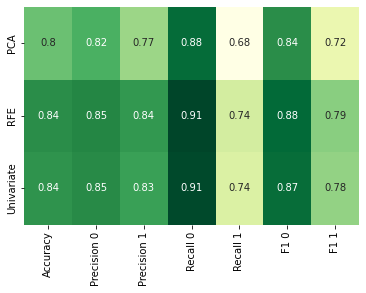

In [254]:
#Spoji rezultate
testing_df = pd.DataFrame.from_dict(selector_testing_results, orient='index')

#Pregled ocena
sns.heatmap(testing_df, annot=testing_df, cmap="YlGn", cbar=False)

## Klasterovanje

In [289]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [336]:
#Grupisanje KMeans algoritmom u dva klastera

kmeans = KMeans(n_clusters=2)
df['Cluster'] = kmeans.fit_predict(X)

In [337]:
total_count = df.shape[0]

#Pretpostavka da su preziveli u klasteru 1
comparison_column_1 = np.where(df["Survived"] == df["Cluster"], True, False)

#Pretpostavka da su preziveli u klasteru 0
comparison_column_0 = np.where(df["Survived"] == df["Cluster"], False, True)

print("Accuracy if survived in cluster 1: {:.3%}".format(np.count_nonzero(comparison_column_1)/total_count))
print("Accuracy if survived in cluster 0: {:.3%}".format(np.count_nonzero(comparison_column_0)/total_count))

Accuracy if survived in cluster 1: 33.296%
Accuracy if survived in cluster 0: 66.704%


<AxesSubplot:>

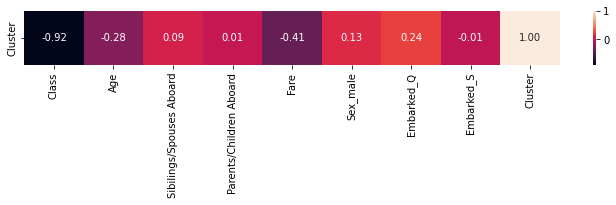

In [338]:
#Pregled koliko koja kolona utice na klasterizaciju
plt.figure(figsize=(12,1))
corr_df = df.drop(columns=['Survived']).corr().loc[['Cluster']]
sns.heatmap(corr_df, annot=True, fmt='.2f')

In [339]:
#Grupisanje hijerarhijskim algoritmom u dva klastera

agg = AgglomerativeClustering(n_clusters=2)
df['Cluster'] = agg.fit_predict(X)

In [340]:
total_count = df.shape[0]

#Pretpostavka da su preziveli u klasteru 1
comparison_column_1 = np.where(df["Survived"] == df["Cluster"], True, False)

#Pretpostavka da su preziveli u klasteru 0
comparison_column_0 = np.where(df["Survived"] == df["Cluster"], False, True)

print("Accuracy if survived in cluster 1: {:.3%}".format(np.count_nonzero(comparison_column_1)/total_count))
print("Accuracy if survived in cluster 0: {:.3%}".format(np.count_nonzero(comparison_column_0)/total_count))

Accuracy if survived in cluster 1: 66.704%
Accuracy if survived in cluster 0: 33.296%


<AxesSubplot:>

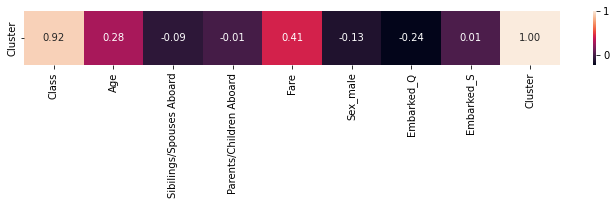

In [341]:
#Pregled koliko koja kolona utice na klasterizaciju
plt.figure(figsize=(12,1))
corr_df = df.drop(columns=['Survived']).corr().loc[['Cluster']]
sns.heatmap(corr_df, annot=True, fmt='.2f')